# Importing The Libraries

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection

Using the JSearch API we can type in 'Data Analyst in India' and get the search results. The results are stored in JSON format 

In [3]:
url = "https://jsearch.p.rapidapi.com/search"

page = 1
num_pages = 20
dataset = []

while page<=100:
    querystring = {"query":"Data Scientist in India","page":str(page),"num_pages":str(num_pages)}

    headers = {"X-RapidAPI-Key": "bf819297demsha06e93e4b9aecb1p1b16ccjsn728f04d84771",
               "X-RapidAPI-Host": "jsearch.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)
    dataset.append(response.json())
    page+=20

print(len(dataset))
data = response.json()
data = data['data']

5


# Data Cleaning

We initialize an empty dataframe first.Then we insert employer name, job title, job description and job city into the dataframe

In [4]:
df = pd.DataFrame({'employer_name': pd.Series(dtype = 'str'),
                'job_title': pd.Series(dtype = 'str'),
                'job_description': pd.Series(dtype = 'str'),
                'job_city': pd.Series(dtype = 'str')})


In [5]:
j = 0
while j<5:
    data_new = dataset[j]
    data = data_new['data']
    for i in range(len(data)):
        row = pd.Series([data[i]['employer_name'],data[i]['job_title'],data[i]['job_description'],data[i]['job_city']],index = df.columns)
        df = df.append(row,ignore_index = True)
    j+=1

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   employer_name    308 non-null    object
 1   job_title        308 non-null    object
 2   job_description  308 non-null    object
 3   job_city         263 non-null    object
dtypes: object(4)
memory usage: 9.8+ KB
None


We set the keywords that we are going to search in the job description and store them in a list. We then create new boolean columns with the same name as these items.

In [7]:
data_languages = ['Python','R','SQL','Java','Scala','C++','JavaScript']
softwares = ['Excel','Power BI','Tableau','SPSS','SAS','QlikView']

In [8]:
df2 = df.copy()
for i in range(len(data_languages)):
    df2[data_languages[i]] = pd.Series(dtype = 'boolean')
for i in range(len(softwares)):
    df2[softwares[i]] = pd.Series(dtype = 'boolean')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employer_name    308 non-null    object 
 1   job_title        308 non-null    object 
 2   job_description  308 non-null    object 
 3   job_city         263 non-null    object 
 4   Python           0 non-null      boolean
 5   R                0 non-null      boolean
 6   SQL              0 non-null      boolean
 7   Java             0 non-null      boolean
 8   Scala            0 non-null      boolean
 9   C++              0 non-null      boolean
 10  JavaScript       0 non-null      boolean
 11  Excel            0 non-null      boolean
 12  Power BI         0 non-null      boolean
 13  Tableau          0 non-null      boolean
 14  SPSS             0 non-null      boolean
 15  SAS              0 non-null      boolean
 16  QlikView         0 non-null      boolean
dtypes: boolean(13), 

We then check whether a keyword is part of a job description. If it is then we set the value of that particular keyword's column in that particular row as 1, otherwise we set it to 0. 

In [10]:
df3 = df2.copy()
for i,k in enumerate(df3['job_description']):
    for j in data_languages:
        text = df3['job_description'].str.lower()[i]
        text = text.replace('\n','')
        text = text.replace('\t','')
        if j == 'R':
            j1 = ' R '
            j1 = j1.lower()
        elif j == 'Scala':
            j1 = ' Scala '
            j1 = j1.lower()
        else:
            j1 = j.lower()
        if text.find(j1) != -1:
            df3.loc[df3.job_description==k,j] = 1
    for j in softwares:
        text = df3['job_description'].str.lower()[i]
        text = text.replace('\t','')
        text = text.replace('\n','')
        j1 = j.lower()
        if text.find(j1) != -1:
            df3.loc[df3.job_description==k,j] = 1

In [11]:
df3[data_languages] = df3[data_languages].fillna(0)
df3[softwares] = df3[softwares].fillna(0)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employer_name    308 non-null    object 
 1   job_title        308 non-null    object 
 2   job_description  308 non-null    object 
 3   job_city         263 non-null    object 
 4   Python           308 non-null    boolean
 5   R                308 non-null    boolean
 6   SQL              308 non-null    boolean
 7   Java             308 non-null    boolean
 8   Scala            308 non-null    boolean
 9   C++              308 non-null    boolean
 10  JavaScript       308 non-null    boolean
 11  Excel            308 non-null    boolean
 12  Power BI         308 non-null    boolean
 13  Tableau          308 non-null    boolean
 14  SPSS             308 non-null    boolean
 15  SAS              308 non-null    boolean
 16  QlikView         308 non-null    boolean
dtypes: boolean(13), 

Finally we select only those rows that have 'data scientist' in its job title. We then export this dataframe to a csv

In [13]:
df3 = df3[df3['job_title'].str.lower().str.find('data scientist') != -1]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 307
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employer_name    269 non-null    object 
 1   job_title        269 non-null    object 
 2   job_description  269 non-null    object 
 3   job_city         232 non-null    object 
 4   Python           269 non-null    boolean
 5   R                269 non-null    boolean
 6   SQL              269 non-null    boolean
 7   Java             269 non-null    boolean
 8   Scala            269 non-null    boolean
 9   C++              269 non-null    boolean
 10  JavaScript       269 non-null    boolean
 11  Excel            269 non-null    boolean
 12  Power BI         269 non-null    boolean
 13  Tableau          269 non-null    boolean
 14  SPSS             269 non-null    boolean
 15  SAS              269 non-null    boolean
 16  QlikView         269 non-null    boolean
dtypes: boolean(13), 

In [14]:
df3.to_csv('Data Scientist.csv',index = False)

# Exploratory Data Analysis

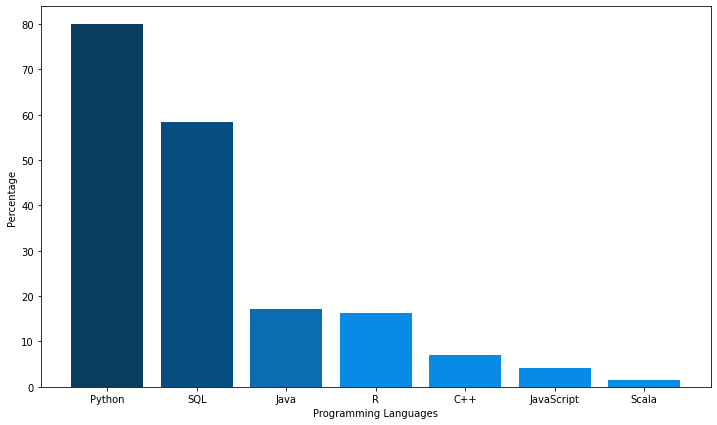

In [15]:
D = dict()
for i in data_languages:
    D[i] = df3[i].sum()/len(df3[i])*100
keys = list(D.keys())
values = list(D.values())
sorted_value_index = np.argsort(values)[::-1]
D = {keys[i]: values[i] for i in sorted_value_index}
plt.figure(figsize=(12,7))
plt.bar(range(len(D)), list(D.values()), align='center',color=['#093c5f','#064e80','#0b6db0','#078be6','#078be6','#078be6','#078be6'])
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Programming Languages')
plt.ylabel('Percentage')
plt.show()

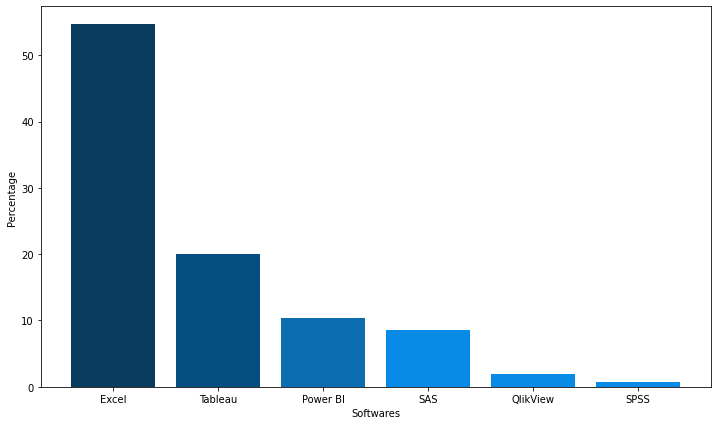

In [16]:
D = dict()
for i in softwares:
    D[i] = df3[i].sum()/len(df3[i])*100
keys = list(D.keys())
values = list(D.values())
sorted_value_index = np.argsort(values)[::-1]
D = {keys[i]: values[i] for i in sorted_value_index}
plt.figure(figsize=(12,7))
plt.bar(range(len(D)), list(D.values()), align='center',color=['#093c5f','#064e80','#0b6db0','#078be6','#078be6','#078be6'])
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel('Softwares')
plt.ylabel('Percentage')
plt.show()

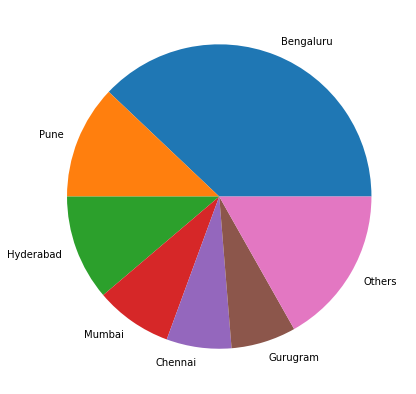

In [17]:
a = df3['job_city'].value_counts()
b = []
rest = 0
for i in a:
    if i<10:
        rest+=i
    else:
        b.append(i)
b.append(rest)
c = list(a.index)
c = c[:6]
c.append('Others')
plt.figure(figsize=(10,7))
plt.pie(b,labels=c)
plt.show()